In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\omkar\OneDrive\Desktop\Datasets\netflix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [81]:
df.isnull().sum()/len(df) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [82]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There is no duplicates.

In [83]:
df.director.fillna("Unknown",inplace=True)

In [84]:
df.cast.fillna("Unknown",inplace=True)

In [85]:
# Drop the nulll values because if it doesn't have the country then no need.
df.dropna(subset='country',inplace=True)


In [86]:

# Drop the nulll values because if it doesn't have the country then no need.
df.dropna(subset='date_added',inplace=True)

In [87]:
df.rating.fillna(df['rating'].mode()[0],inplace=True)

In [88]:

df.duration.fillna(df['duration'].mode()[0],inplace=True)

Adding the mode value to the categorical variablesn which finds the null values and also less important.

In [89]:
df.isnull().sum()/len(df) * 100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [90]:
df.date_added.unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [91]:
df.release_year.unique()

array([2020, 2021, 1993, 2018, 1998, 2010, 2013, 2017, 1975, 1978, 1983,
       1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008, 2009, 2007,
       2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990, 1991, 1999,
       1986, 1992, 1996, 1984, 1997, 1980, 1961, 1995, 1985, 2000, 1976,
       1959, 1988, 1972, 1981, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967, 1968,
       1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [92]:
df['data_added_New'] = pd.to_datetime(df['date_added'],errors='coerce')

In [93]:
df['data_added_New'].isnull().sum()

85

Dropping the null values which don't have date added to netflix which is used useful for our analysis.

In [94]:
df.dropna(subset=['data_added_New'], inplace=True)

In [95]:
df['data_added_New'].isnull().sum()

0

In [77]:

pd.set_option('display.max_rows',None)

### 1.What type of content is available in different countries?

In [121]:
# explode() add new rows to the dataframe as list that splited,with new column.
df['country_new'] = df['country'].str.split(',').explode('country_new')


In [125]:
df.reset_index(drop=True).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_New,country_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,United States
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,South Africa
2,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,Ghana
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,Germany
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,Germany


In [126]:
df['type'].value_counts()

type
Movie      7379
TV Show    2533
Name: count, dtype: int64

In [132]:
df['country_new'] = df['country_new'].str.lower()

In [136]:
df['country_new'] = df['country_new'].str.strip()

In [140]:
df['country_new'].value_counts().reset_index()

,country_new,count
0,united states,2980
1,united kingdom,814
2,india,794
3,france,565
4,canada,491
5,japan,360
6,germany,354
7,spain,291
8,south korea,220
9,mexico,204


In [129]:
df.duplicated().sum

2030

In [134]:
df.head(200)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_New,country_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,united states
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,south africa
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,ghana
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,ethiopia


In [145]:
df['country_new'].unique()

array(['united states', 'south africa', 'ghana', 'germany', 'ethiopia',
       'united kingdom', 'burkina faso', 'czech republic', 'mexico',
       'india', 'australia', 'france', 'finland', 'china', 'canada',
       'japan', 'nigeria', 'spain', 'belgium', 'south korea', 'singapore',
       'italy', 'romania', 'russia', 'hong kong', '', 'ireland', 'nepal',
       'new zealand', 'brazil', 'colombia', 'argentina', 'taiwan',
       'algeria', 'poland', 'israel', 'saudi arabia', 'thailand',
       'indonesia', 'egypt', 'denmark', 'switzerland', 'kuwait',
       'netherlands', 'malaysia', 'vietnam', 'hungary', 'sweden',
       'lebanon', 'syria', 'philippines', 'iceland', 'turkey',
       'united arab emirates', 'bulgaria', 'norway', 'qatar', 'mauritius',
       'austria', 'cameroon', 'palestine', 'uruguay', 'kenya', 'chile',
       'luxembourg', 'cambodia', 'bangladesh', 'portugal',
       'cayman islands', 'senegal', 'serbia', 'malta', 'namibia',
       'angola', 'peru', 'mozambique', 'be

In [149]:
df['country_new'] = df['country_new'].replace({'united states':'U.S','united kingdom':'U.K',' ':'Unknown'})


In [151]:
df['country_new'].isnull().sum()

0

In [160]:
top_countries =  df['country_new'].value_counts().index[:10]
df_filtered   = df[df['country_new'].isin(top_countries)]


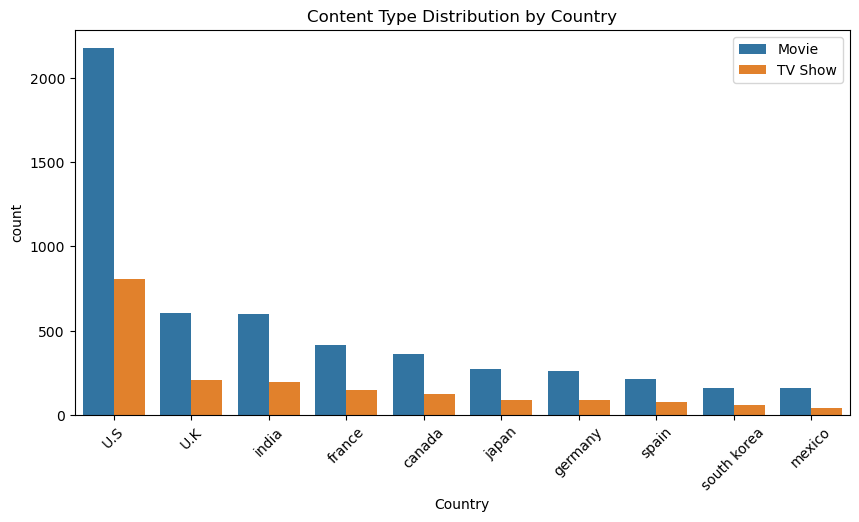

In [170]:
plt.figure(figsize=(10,5))
# sns.barplot(x=df_filtered['country_new'].value_counts().index[:10],y=df_filtered['country_new'].value_counts().values[:10],hue=df_filtered['type'])
sns.countplot(x='country_new',hue='type',data = df_filtered,order = top_countries)
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend()
plt.title('Content Type Distribution by Country')
plt.show()

### Note:
        Clearly U.S has highest number of movies as well as T.V shows.After that U.K and india has the most.In all of the top 10 Countries released more movies as compared to T.V shows.  

### 2.How has the number of movies released per year changed over the last 20-30 years?

In [196]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_New,country_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,U.S


In [190]:
filter_df = df[df['type'] == 'Movie']['release_year'].value_counts().reset_index()
year_df =  filter_df[filter_df.release_year >= 1995]
year_df


,release_year,count
0,2017,937
1,2018,911
2,2016,858
3,2019,695
4,2015,522
5,2020,509
6,2014,373
7,2013,283
8,2012,225
9,2010,208


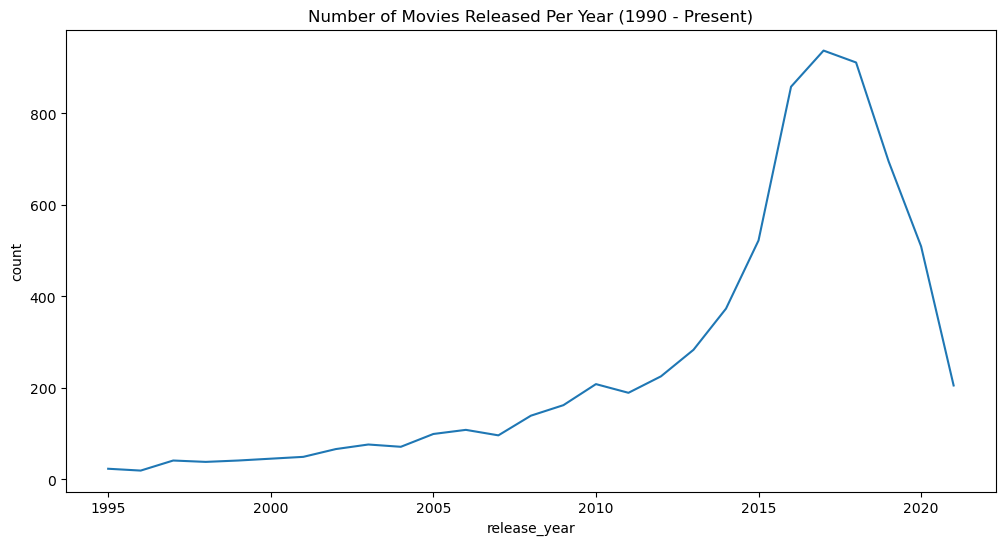

In [193]:
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year',y='count',data = year_df)
plt.title("Number of Movies Released Per Year (1990 - Present)")
plt.show()

### note:
        In 2017 highest number of movies were released after that number of movies were decreased from 2018 to till now.
        From 2011 started increasing follwed by steady for couple of years,To conclude number of movies were decreased.

### 3.Comparison of tv shows vs. movies.

In [197]:
df['type'].value_counts()

type
Movie      7379
TV Show    2533
Name: count, dtype: int64

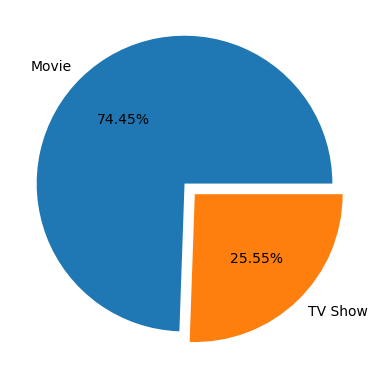

In [211]:
plt.pie(df['type'].value_counts(),labels = df['type'].value_counts().index,autopct = '%0.2f%%',explode = (0.1,0.0))
plt.show()

### Note 
    74.45% of movies were released and 25.55% of the TV show were released It contains more number of movies. 

In [212]:
filter_df = df[df['type'] == 'TV Show']['release_year'].value_counts().reset_index()
year_df =  filter_df[filter_df.release_year >= 1995]
year_df


,release_year,count
0,2020,445
1,2019,396
2,2018,363
3,2017,258
4,2021,244
5,2016,207
6,2015,149
7,2014,80
8,2013,59
9,2012,54


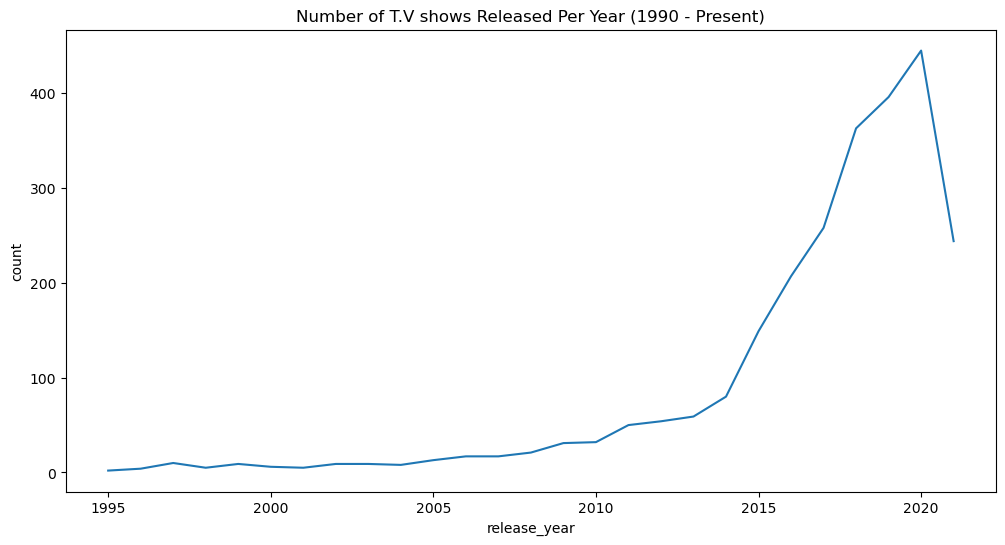

In [213]:
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year',y='count',data = year_df)
plt.title("Number of T.V shows Released Per Year (1990 - Present)")
plt.show()

### 4.What is the best time to launch a TV show?

In [214]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_New,country_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,U.S


In [217]:
df.rename(columns = {'data_added_New':'date_added_New'},inplace=True)

In [218]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_New,country_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,U.S


In [224]:
df['month'] = df['date_added_New'].dt.month
df['day'] = df['date_added_New'].dt.day
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_New,country_new,month,Year,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,U.S,9,25,25


In [226]:
df.drop(columns = ['Year'],inplace = True)


In [227]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_New,country_new,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,U.S,9,25


In [237]:
release_df =  df[df['type']=='TV Show']['month'].value_counts().sort_index()
release_df

month
1     216
2     183
3     196
4     209
5     176
6     212
7     234
8     210
9     220
10    196
11    214
12    267
Name: count, dtype: int64

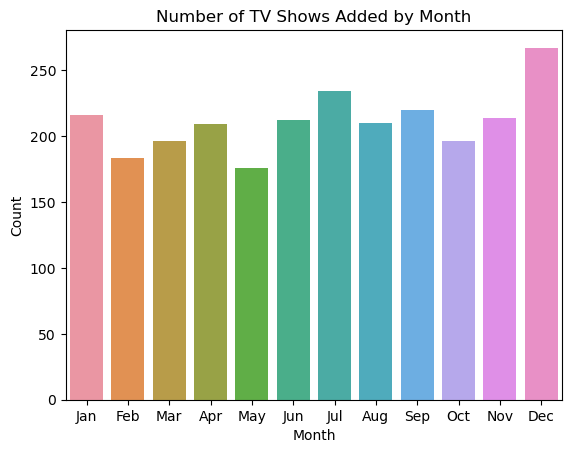

In [241]:
sns.barplot(x=df[df['type']=='TV Show']['month'].value_counts().index,y=df[df['type']=='TV Show']['month'].value_counts().values)
plt.title('Number of TV Shows Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [232]:
df[df['type']=='TV Show']['day'].value_counts()

day
1     508
15    224
30     88
31     87
22     85
6      85
10     80
19     75
17     73
2      70
14     68
16     68
5      67
20     66
8      65
28     62
13     59
27     58
23     56
26     55
21     55
12     52
4      51
9      51
18     50
7      50
11     49
24     47
25     46
3      45
29     38
Name: count, dtype: int64

### Observation:
        Based on the previous releases clearly DEC 1st is the best time to release the new T.V show

### 5.Analysis of actors/directors of different types of shows/movies.

In [242]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_New,country_new,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,U.S,9,25
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,south africa,9,24
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,ghana,9,24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany,9,24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,germany,9,24


In [243]:
df['director'].nunique()

4284

In [244]:
pd.reset_option('display.max_rows',None)

In [245]:
df['director'].value_counts()

director
Unknown                     2459
Martin Scorsese               18
Steven Spielberg              18
Raúl Campos, Jan Suter        18
Youssef Chahine               17
                            ... 
Bille August                   1
Sarthak Dasgupta               1
Jennifer Kaytin Robinson       1
Alan Rickman                   1
Mozez Singh                    1
Name: count, Length: 4284, dtype: int64

### 7.Does Netflix has more focus on TV Shows than movies in recent years?


In [246]:
filter_df = df[df['type'] == 'Movie']['release_year'].value_counts().reset_index()
movie_df =  filter_df[filter_df.release_year >= 1995]
movie_df


,release_year,count
0,2017,937
1,2018,911
2,2016,858
3,2019,695
4,2015,522
5,2020,509
6,2014,373
7,2013,283
8,2012,225
9,2010,208


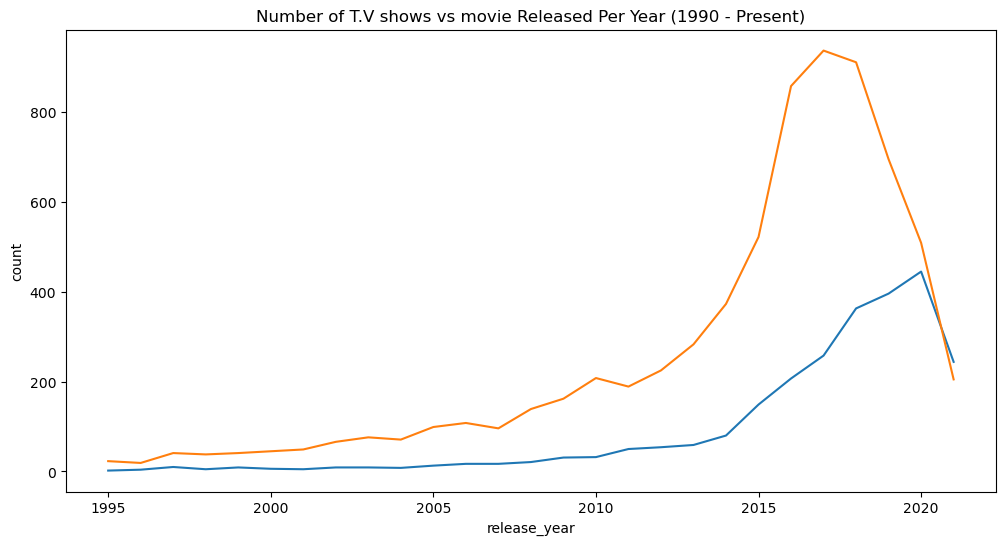

In [256]:
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year',y='count',data = year_df)
sns.lineplot(x='release_year',y='count',data = movie_df)

plt.title("Number of T.V shows vs movie Released Per Year (1990 - Present)")

plt.show()